# IMPORT LIBRARY 

In [56]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn .ensemble import RandomForestClassifier 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV



import warnings
warnings.filterwarnings('ignore')


# READ DATA 

In [57]:
 df=pd.read_csv("/kaggle/input/cinema-ticket/cinemaTicket_Ref.csv")

# EDA 

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [59]:
df['date'] = pd.to_datetime(df['date'])


In [60]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [61]:
df.describe()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
count,142524.000000,142524.000000,1.425240e+05,142524.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142399.000000,142524,142524.000000,142524.000000,142524.000000
mean,1518.985111,320.378427,1.234728e+07,140.137570,0.237413,3.932103,19.965986,81234.599886,139.900157,854.723605,2018-07-09 16:31:53.210406400,6.776852,2.634721,16.112585
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2018-02-21 00:00:00,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1.260000e+06,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,2018-05-13 00:00:00,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3.720000e+06,50.000000,0.000000,3.000000,10.350000,79454.235185,50.000000,525.714286,2018-07-08 00:00:00,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,1.110000e+07,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,2018-09-03 00:00:00,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,2018-11-04 00:00:00,11.000000,4.000000,31.000000
std,36.184450,159.701229,3.065486e+07,279.758733,2.923206,3.056276,22.653445,33236.599278,279.564935,953.118103,NaN,2.195843,0.809692,8.949471


In [62]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
film_code,142524.0,1518.985111,1471.0,1485.0,1498.0,1556.0,1589.0,36.18445
cinema_code,142524.0,320.378427,32.0,181.0,324.0,474.0,637.0,159.701229
total_sales,142524.0,12347275.407531,20000.0,1260000.0,3720000.0,11100000.0,1262819994.0,30654858.289364
tickets_sold,142524.0,140.13757,1.0,18.0,50.0,143.0,8499.0,279.758733
tickets_out,142524.0,0.237413,0.0,0.0,0.0,0.0,311.0,2.923206
show_time,142524.0,3.932103,1.0,2.0,3.0,5.0,60.0,3.056276
occu_perc,142399.0,19.965986,0.0,3.75,10.35,28.21,147.5,22.653445
ticket_price,142524.0,81234.599886,483.870968,60000.0,79454.235185,100000.0,700000.0,33236.599278
ticket_use,142524.0,139.900157,-219.0,18.0,50.0,143.0,8499.0,279.564935
capacity,142399.0,854.723605,-2.0,276.994486,525.714286,1038.961039,9692.09716,953.118103


In [63]:
df.isna().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [64]:
df.dropna(axis=1, inplace=True)

In [65]:
df.isna().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
ticket_price    0
ticket_use      0
date            0
month           0
quarter         0
day             0
dtype: int64

In [66]:
df.tail()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,ticket_price,ticket_use,date,month,quarter,day
142519,1569,495,1320000,22,0,2,60000.0,22,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,80000.0,15,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,132500.0,8,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,120000.0,5,2018-11-04,11,4,4
142523,1569,486,250000,5,0,1,50000.0,5,2018-11-04,11,4,4


In [67]:
df.shape

(142524, 12)

In [68]:
df.columns 

Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'ticket_price', 'ticket_use', 'date',
       'month', 'quarter', 'day'],
      dtype='object')

In [69]:
df.dtypes

film_code                int64
cinema_code              int64
total_sales              int64
tickets_sold             int64
tickets_out              int64
show_time                int64
ticket_price           float64
ticket_use               int64
date            datetime64[ns]
month                    int64
quarter                  int64
day                      int64
dtype: object

In [70]:
df.describe().iloc[: ,:5]


,film_code,cinema_code,total_sales,tickets_sold,tickets_out
count,142524.000000,142524.000000,1.425240e+05,142524.000000,142524.000000
mean,1518.985111,320.378427,1.234728e+07,140.137570,0.237413
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000
25%,1485.000000,181.000000,1.260000e+06,18.000000,0.000000
50%,1498.000000,324.000000,3.720000e+06,50.000000,0.000000
75%,1556.000000,474.000000,1.110000e+07,143.000000,0.000000
max,1589.000000,637.000000,1.262820e+09,8499.000000,311.000000
std,36.184450,159.701229,3.065486e+07,279.758733,2.923206


In [71]:
df.drop_duplicates()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,ticket_price,ticket_use,date,month,quarter,day
0,1492,304,3900000,26,0,4,150000.0,26,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,80000.0,42,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,80000.0,32,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,100000.0,12,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,80000.0,15,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,60000.0,22,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,80000.0,15,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,132500.0,8,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,120000.0,5,2018-11-04,11,4,4


In [72]:
df.duplicated().any()

True

In [73]:
df['date'].value_counts()


date
2018-05-15    790
2018-05-08    784
2018-05-11    778
2018-05-10    774
2018-05-09    766
             ... 
2018-06-05      4
2018-10-30      2
2018-02-23      1
2018-02-21      1
2018-09-21      1
Name: count, Length: 234, dtype: int64

<Axes: ylabel='ticket_use'>

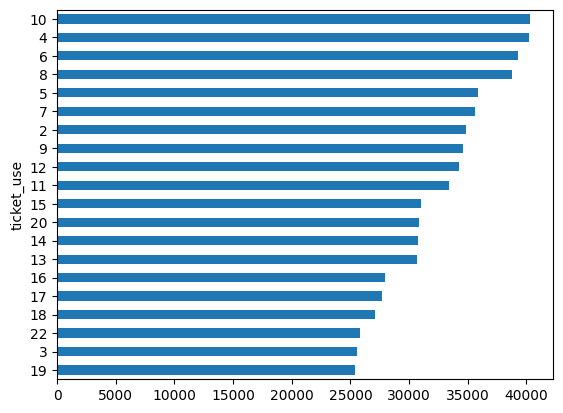

In [74]:
df.groupby("ticket_use")["day"].sum().sort_values(ascending=True).tail(20).plot.barh()

In [75]:
df.columns

Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'ticket_price', 'ticket_use', 'date',
       'month', 'quarter', 'day'],
      dtype='object')

<Axes: ylabel='ticket_use'>

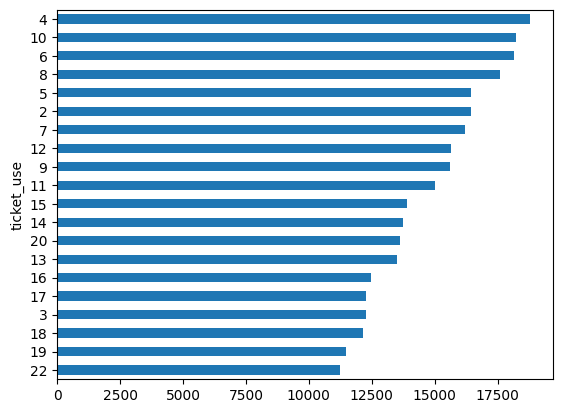

In [76]:
df.groupby("ticket_use")["month"].sum().sort_values(ascending=True).tail(20).plot.barh()

<Axes: ylabel='total_sales'>

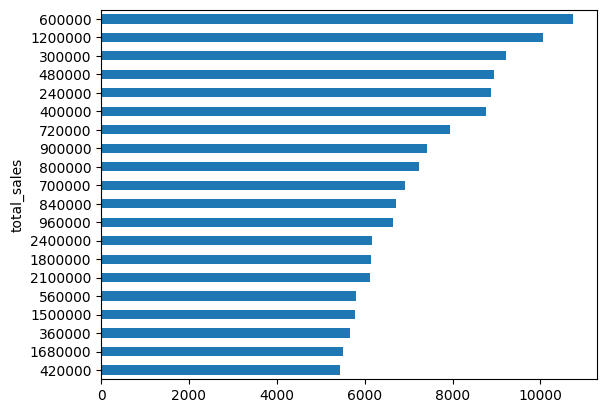

In [77]:
df.groupby("total_sales")["month"].sum().sort_values(ascending=True).tail(20).plot.barh()

<Axes: ylabel='total_sales'>

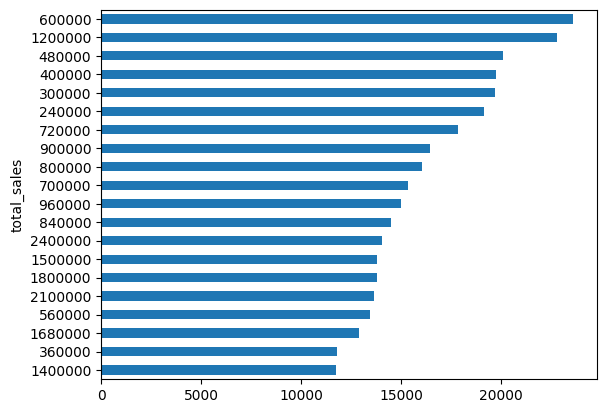

In [78]:
df.groupby("total_sales")["day"].sum().sort_values(ascending=True).tail(20).plot.barh()

<Axes: ylabel='ticket_use'>

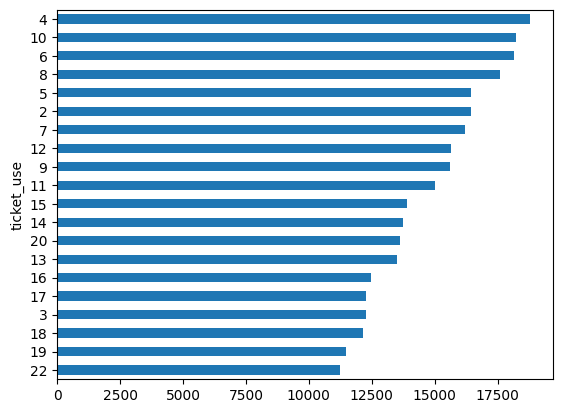

In [79]:
df.groupby("ticket_use")["month"].sum().sort_values(ascending=True).tail(20).plot.barh()

<Axes: ylabel='ticket_use'>

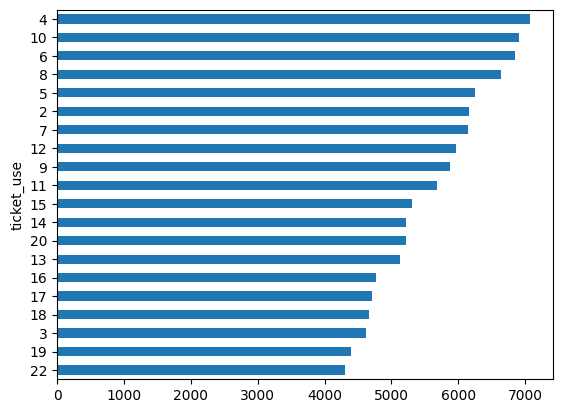

In [80]:
df.groupby("ticket_use")["quarter"].sum().sort_values(ascending=True).tail(20).plot.barh()

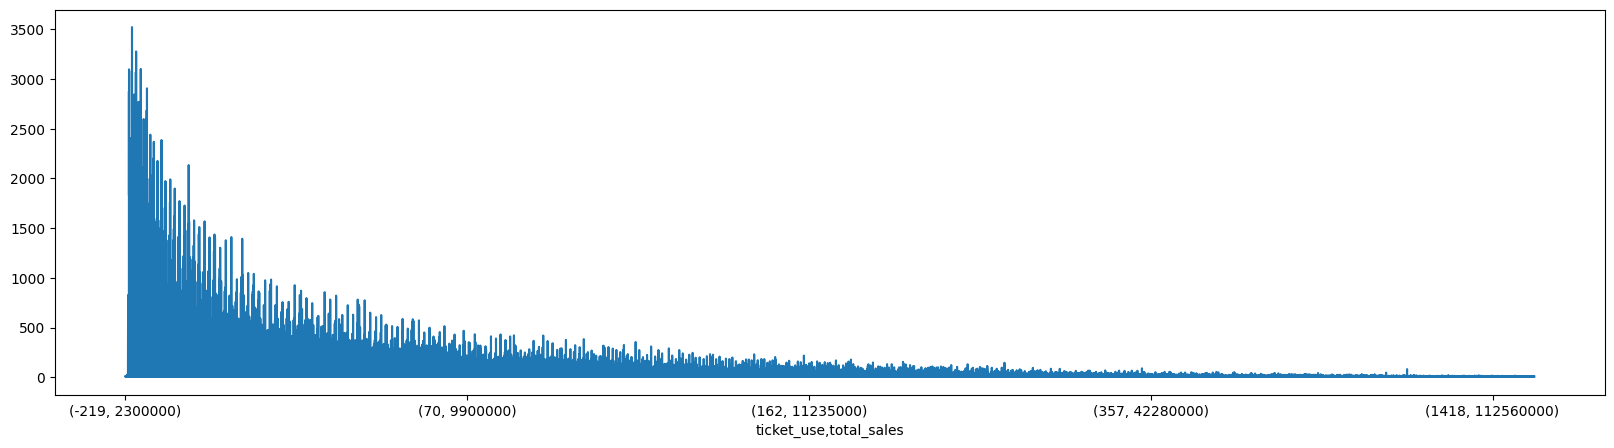

In [81]:
plt.figure(figsize=(20,5))
df.groupby(['ticket_use','total_sales'])['month'].sum().plot();

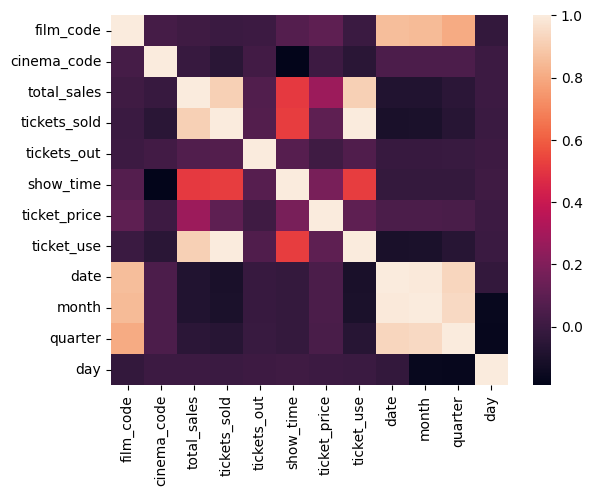

In [82]:
sns.heatmap(df.corr())
plt.show()

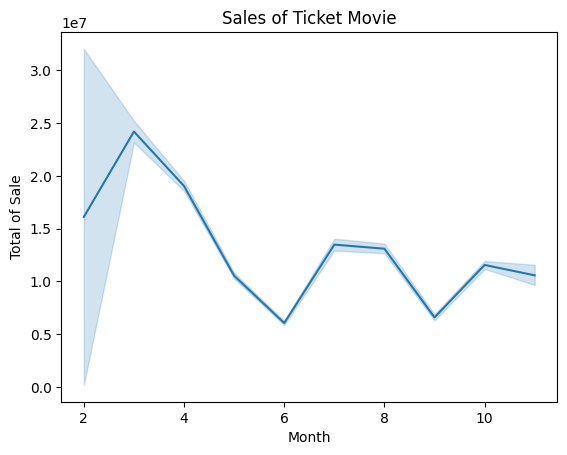

In [84]:
sns.lineplot(x=df['month'],y=df['total_sales'])

plt.title("Sales of Ticket Movie")
plt.xlabel("Month")
plt.ylabel("Total of Sale")

plt.show()

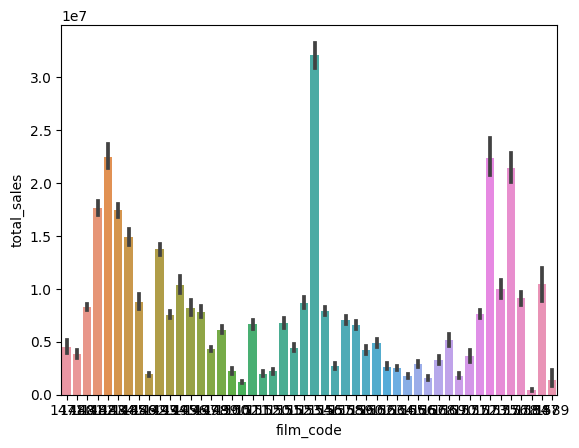

In [85]:
sns.barplot(x=df['film_code'],y=df['total_sales'])

plt.show()

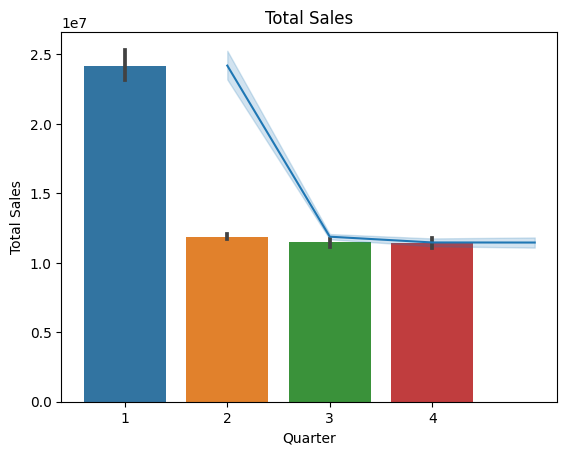

In [86]:
sns.barplot(x=df['quarter'],y=df['total_sales'])
sns.lineplot(x=df['quarter'],y=df['total_sales'])

plt.title("Total Sales")
plt.xlabel("Quarter")
plt.ylabel("Total Sales")
plt.show()

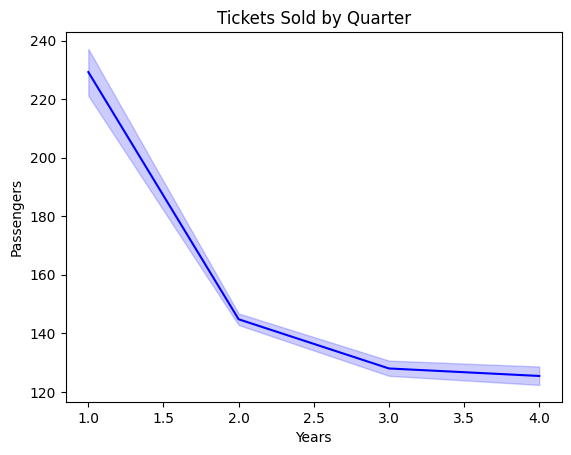

In [88]:
sns.lineplot(data=df, x="quarter", y="tickets_sold",color="b")

plt.title("Tickets Sold by Quarter")
plt.xlabel("Years")
plt.ylabel("Passengers")
plt.show()

<Axes: xlabel='date'>

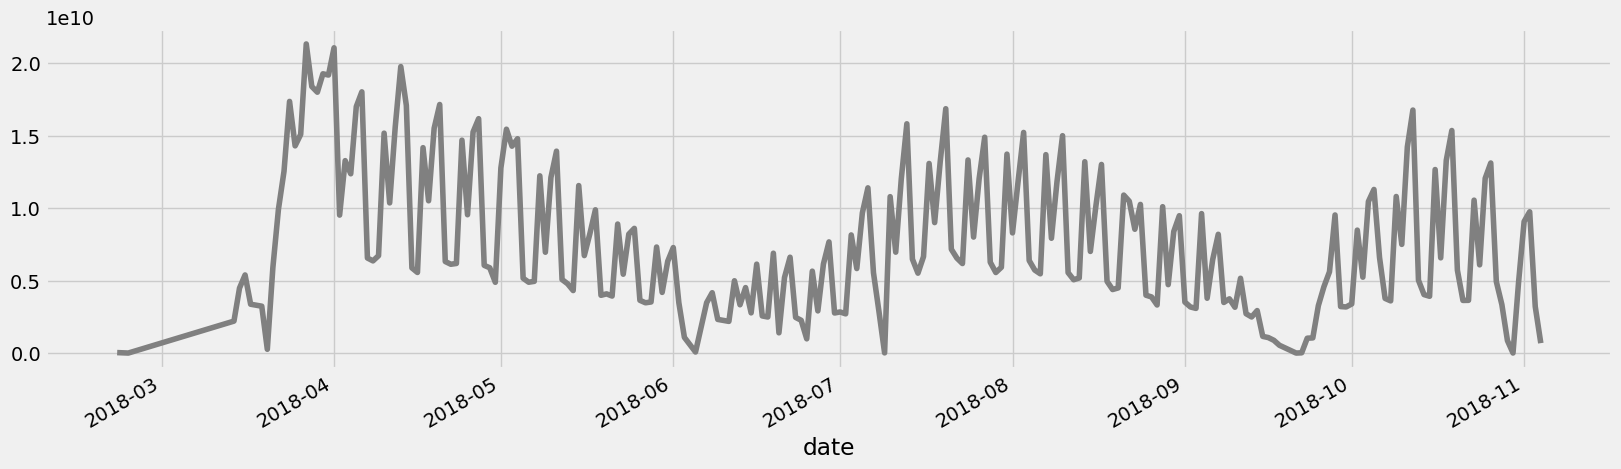

In [90]:
plt.style.use('fivethirtyeight')
df.groupby('date')['total_sales'].sum().plot(figsize=(18, 5), color='grey')